In [1]:
#Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
import numpy as np
import scipy
import itertools

from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing




/Users/saminho/opt/anaconda3/envs/ada/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.7.0 and strictly below 2.10.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.4.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [2]:
hiphop = pd.read_csv('data/hiphop.csv')
hiphop = hiphop.drop(columns = ['Unnamed: 0.1'], axis = 1)


In [3]:
hiphop['index'] = '1'

In [4]:
for i in range(0,len(hiphop)-1):
    hiphop.iloc[i:,-1] = i
hiphop


,Unnamed: 0,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Year,index
0,0,Limp Bizkit,Rollin' (Air Raid Vehicle),3IV4swNduIRunHREK80owz,73,0.603,0.933,1,-3.358,1,0.1710,0.005910,0.000000,0.2060,0.709,96.306,213760,4,2000,0
1,1,Limp Bizkit,My Way,2gSVKxPDww9Eep5rdvtdem,69,0.576,0.864,6,-3.981,1,0.0462,0.020000,0.000002,0.6830,0.609,97.225,272973,4,2000,1
2,2,Limp Bizkit,Take A Look Around,2avKuMN2QXkaG9vvHa2JLt,71,0.425,0.852,11,-5.607,1,0.0460,0.017500,0.306000,0.0935,0.512,101.968,321040,4,2000,2
3,3,Eminem,Bitch Please II,7lgvU7WnwcNZ8dbGUz8yhP,70,0.918,0.586,1,-2.890,1,0.1330,0.078300,0.000000,0.1450,0.779,95.517,288200,4,2000,3
4,4,Ja Rule,Put It On Me,0OvwzS8FX73Bw7ykMRmffU,62,0.831,0.790,1,-4.714,0,0.1650,0.002400,0.000000,0.0515,0.791,93.140,262827,4,2000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20389,830,Supa Bwe,ANUBIS & T'CHALLA WALK INTO A BAR,2CHAlZ6v04dKz4gXrpixXW,15,0.527,0.563,9,-11.936,1,0.1960,0.004630,0.000000,0.6850,0.420,167.812,120286,4,2022,20389
20390,831,Gunplay,Pull Da Mask Up (feat. Young Breed & Spook Loc),6KIiixj9rL0P51925PXk93,17,0.638,0.725,1,-6.067,1,0.3180,0.000725,0.000000,0.0902,0.441,156.277,196296,4,2022,20390
20391,832,5ive,Do Better,1BuGRJTc9DUOp41uxC6wf5,21,0.807,0.514,5,-13.192,0,0.5140,0.003840,0.000000,0.1240,0.496,152.017,164280,5,2022,20391
20392,833,Bone Thugs-N-Harmony,Dark Days,09bko1XTXeyzegUR5XvHYf,21,0.744,0.600,6,-9.212,0,0.2670,0.336000,0.000000,0.0803,0.596,83.952,228571,4,2022,20392


In [5]:
hiphop = hiphop.drop('Unnamed: 0', axis = 1)
hiphop = hiphop.set_index('index')

/Users/saminho/opt/anaconda3/envs/ada/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [6]:
hiphop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20394 entries, 0 to 20392
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       20394 non-null  object 
 1   track_name        20394 non-null  object 
 2   track_id          20394 non-null  object 
 3   popularity        20394 non-null  int64  
 4   danceability      20394 non-null  float64
 5   energy            20394 non-null  float64
 6   key               20394 non-null  int64  
 7   loudness          20394 non-null  float64
 8   mode              20394 non-null  int64  
 9   speechiness       20394 non-null  float64
 10  acousticness      20394 non-null  float64
 11  instrumentalness  20394 non-null  float64
 12  liveness          20394 non-null  float64
 13  valence           20394 non-null  float64
 14  tempo             20394 non-null  float64
 15  duration_ms       20394 non-null  int64  
 16  time_signature    20394 non-null  int64 

In [7]:
hiphop.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,20394.0,24.755761,16.261749,0.000000,12.0000,23.0000,36.000000,88.000
danceability,20394.0,0.699351,0.141523,0.000000,0.6100,0.7180,0.807000,0.981
energy,20394.0,0.697734,0.150494,0.025500,0.5940,0.7050,0.813000,0.999
key,20394.0,5.335785,3.683785,0.000000,1.0000,6.0000,9.000000,11.000
loudness,20394.0,-6.557615,2.461426,-23.252000,-7.8090,-6.2240,-4.896000,1.089
mode,20394.0,0.564578,0.495824,0.000000,0.0000,1.0000,1.000000,1.000
speechiness,20394.0,0.225046,0.135225,0.000000,0.1040,0.2240,0.320000,0.946
acousticness,20394.0,0.150438,0.175710,0.000002,0.0218,0.0811,0.217000,0.951
instrumentalness,20394.0,0.012977,0.081970,0.000000,0.0000,0.0000,0.000006,0.957
liveness,20394.0,0.224894,0.175993,0.007030,0.1020,0.1560,0.311000,0.996


In [8]:
hiphop['duration']=hiphop['duration_ms'].apply(lambda x : round(x/1000))
hiphop.drop('duration_ms', inplace=True, axis=1)

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'key'),
 Text(4.5, 0, 'loudness'),
 Text(5.5, 0, 'mode'),
 Text(6.5, 0, 'speechiness'),
 Text(7.5, 0, 'acousticness'),
 Text(8.5, 0, 'instrumentalness'),
 Text(9.5, 0, 'liveness'),
 Text(10.5, 0, 'valence'),
 Text(11.5, 0, 'tempo'),
 Text(12.5, 0, 'time_signature'),
 Text(13.5, 0, 'Year'),
 Text(14.5, 0, 'duration')]

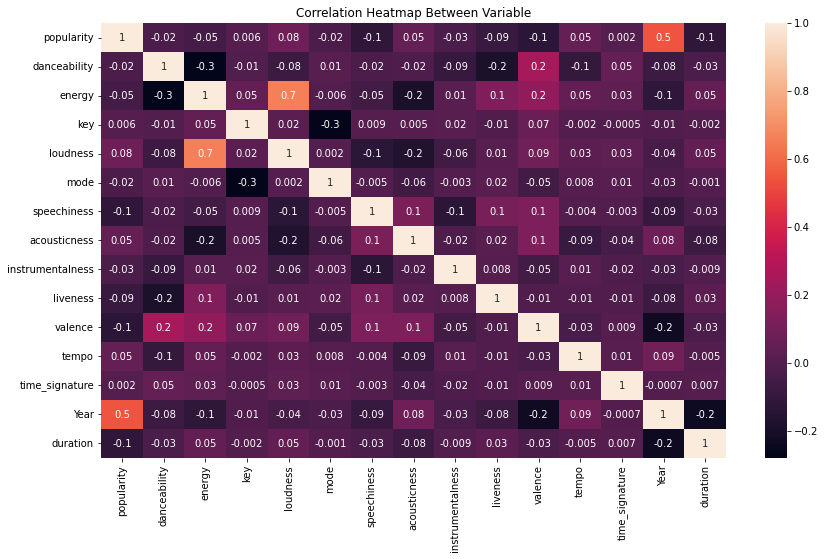

In [9]:
correlation = hiphop.corr(method = 'pearson')
plt.figure(figsize=(14,8))
heatmap=sns.heatmap(correlation, annot=True, fmt='.1g')
heatmap.set_title('Correlation Heatmap Between Variable')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

In [10]:
most_popular = hiphop.query('popularity>40',inplace = False).sort_values('popularity',ascending=False)
most_popular[:10]
##Remark: Kendrick Lamar just dropped his new album at the moment I am doing this project, this album was very anticipated, that's why 
##his name appears so much in the most popular songs (his album is very good though)

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Year,duration
index,,,,,,,,,,,,,,,,,,
19559,Kendrick Lamar,N95,2FeBslNBMdR9V58uv6hd2t,88,0.790,0.670,1,-5.527,1,0.1050,0.3770,0.000002,0.1190,0.408,139.956,4,2022,196
19579,PSY,That That (prod. & feat. SUGA of BTS),5oH4DQAuu1J1800RzUsBWa,86,0.905,0.962,4,-3.197,1,0.0856,0.0299,0.000000,0.0272,0.906,129.969,4,2022,175
19561,Kendrick Lamar,Die Hard,6gI9b2VsoWhjhIuIeToDVs,86,0.775,0.736,1,-8.072,0,0.2470,0.3190,0.001160,0.1270,0.362,100.988,4,2022,239
19560,Future,WAIT FOR U (feat. Drake & Tems),59nOXPmaKlBfGMDeOVGrIK,86,0.463,0.642,1,-4.474,1,0.3400,0.3140,0.000000,0.0686,0.339,83.389,4,2022,190
19562,Kendrick Lamar,United In Grief,05zd5Nv0e02ZqrlC8A2cwx,85,0.529,0.845,8,-8.142,1,0.4040,0.2440,0.000000,0.1430,0.331,85.630,3,2022,255
19564,Kendrick Lamar,Rich Spirit,6kYGOFNUMxpab09L5Ukoke,84,0.852,0.421,10,-9.153,0,0.2080,0.4280,0.000002,0.1060,0.457,95.977,4,2022,202
19563,Kendrick Lamar,Father Time (feat. Sampha),4xIhSUJantE6BMl3u8dtCJ,84,0.514,0.779,10,-4.365,0,0.3440,0.1810,0.000000,0.0990,0.517,152.869,4,2022,222
19566,Kendrick Lamar,Count Me Out,7pj6P5WnxkZsw3XRc8eMe1,83,0.776,0.431,4,-7.544,0,0.0910,0.6710,0.000000,0.1530,0.495,133.999,4,2022,284
19565,Kendrick Lamar,Silent Hill,3tYTyAt1q6BFBiGyYVOLhi,83,0.907,0.577,1,-6.737,0,0.0767,0.4380,0.000032,0.1370,0.801,140.070,4,2022,221


In [11]:
# show top 20 artists by total popularity of their tracks in top 100
most_popular = most_popular[most_popular.artist_name!= 'Kendrick Lamar']
most_popular[['artist_name','track_name']].groupby('artist_name').count().sort_values('track_name', ascending=False).head(20)

,track_name
artist_name,
Lil Wayne,154
Snoop Dogg,64
Freddie Gibbs,46
G-Eazy,42
Chris Brown,39
Dreamville,31
Andy Grammer,29
Post Malone,28
Future,28


In [12]:
hiphop_sample = hiphop.sample(int(0.04*len(hiphop)))
len(hiphop_sample)


815

[Text(0.5, 1.0, 'Loudness Vs Energy')]

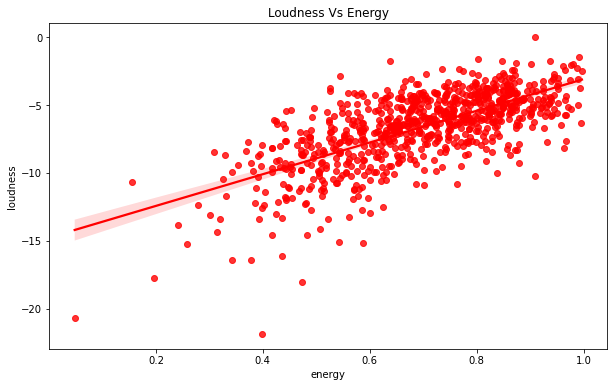

In [13]:
#Analyzing loundness vs Energy 
plt.figure(figsize=(10,6))
sns.regplot(data=hiphop_sample, y='loudness', x='energy', color='r').set(title='Loudness Vs Energy')

[Text(0.5, 1.0, 'Popularity Vs Year')]

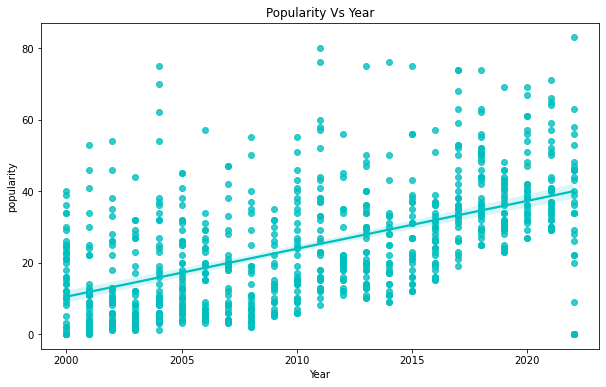

In [14]:
#Popularity vs Year
plt.figure(figsize=(10,6))
sns.regplot(data=hiphop_sample, y='popularity', x='Year', color='c').set(title='Popularity Vs Year')

[Text(0.5, 1.0, 'Popularity Vs Tempo')]

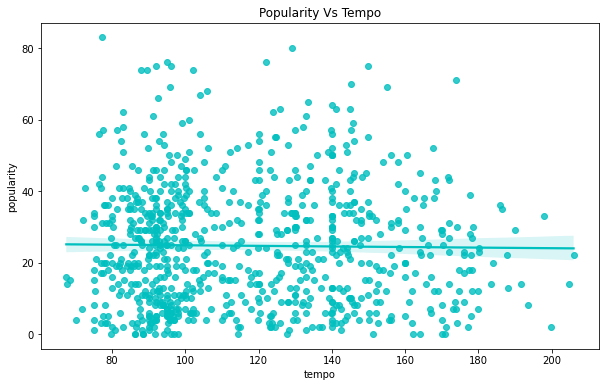

In [15]:
#Popularity vs Tempo
plt.figure(figsize=(10,6))
sns.regplot(data=hiphop_sample, y='popularity', x='tempo', color='c').set(title='Popularity Vs Tempo')

[Text(0.5, 1.0, 'Speechiness Vs Acousticness')]

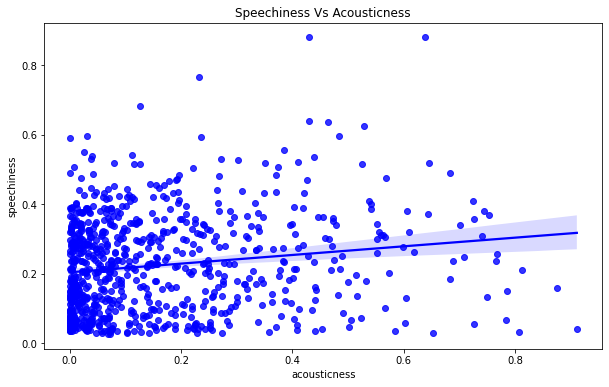

In [16]:
#Speechiness vs Liveness
plt.figure(figsize=(10,6))
sns.regplot(data=hiphop_sample, y='speechiness', x='acousticness', color='b').set(title='Speechiness Vs Acousticness')

In [17]:
numeric_cols = ['popularity','danceability','energy','loudness','speechiness','acousticness','liveness','valence','tempo','duration','Year']
for i in numeric_cols:
    hiphop = hiphop.loc[hiphop[i] != -1].copy(deep=True)

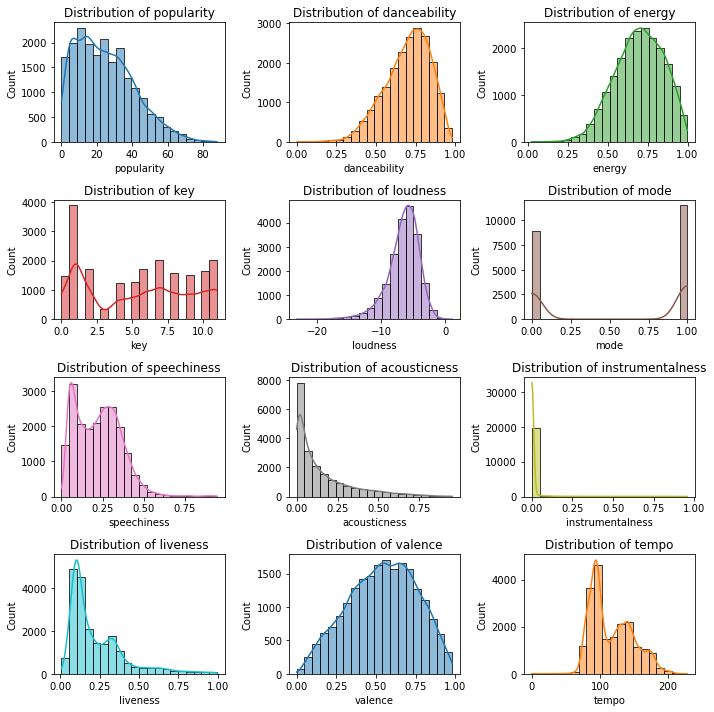

In [18]:
#Plotting the characteristics of the songs we have
#Remark, we are only focusing on a dataset of hiphop songs, so some attributes might not be the most relevant for this genre

characteristics = hiphop.iloc[:,3:]

numeric_cols = characteristics.select_dtypes(include=['int64','float64']).columns

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(10,10))
for i,(col,ax) in enumerate(zip(numeric_cols, axs.flatten())):
    sns.histplot(data=characteristics[col],ax=ax, bins=20, kde=True, color=f'C{i}')
    ax.set(title=f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

#We can use a boxplot or violonplot to show the distribution of the features across the dataframe


In [19]:
#Unsupervised Learning - Principal Component Analysis and KMeans Clustering
#PCA allows us to find low-dimensional reèresentation of the dataset that contains as much as possible as variance
#Only considers the most interesting features, because they account for the majority of the variance

#The first thing we want to do it standardizing our data
 
features = ['popularity','danceability','energy','loudness','speechiness','acousticness','liveness','valence','tempo','duration','Year']
selected_features = hiphop_sample[features]
learning_df = selected_features.copy()

#Standardization 
scaling_data = StandardScaler().fit(learning_df).transform(learning_df)



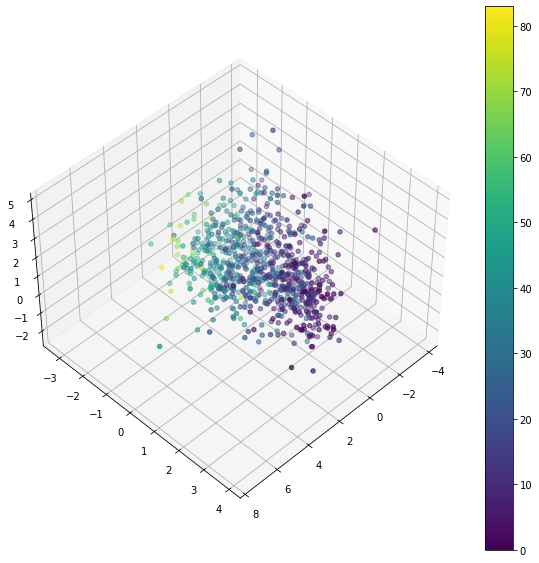

In [20]:
#%matplotlib notebook

pca = PCA(n_components=3)
pca.fit(scaling_data)
x_pca = pca.transform(scaling_data)
np.shape(x_pca)


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')


p = ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c = learning_df['popularity'], s=20) # plot the point (2,3,4) on the figure

fig.colorbar(p)

ax.view_init(45,45)

plt.show()
#Use Jupyter notebook to show this graph 



In [21]:
print('The prinicpal components values are',pca.singular_values_)

The prinicpal components values are [40.60495109 38.13223326 34.02381812]


Text(0, 0.5, 'Silhouette score')

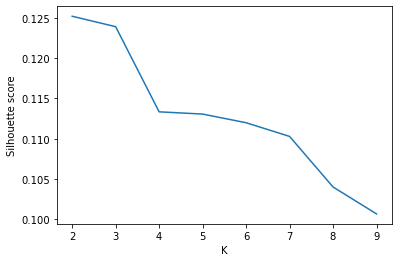

In [22]:
#Silhouttes method to find the perfect number of clusters
silhouettes = []

for k in range(2, 10):
    labels = KMeans(n_clusters=k, random_state=10).fit_predict(scaling_data)
    score = silhouette_score(scaling_data, labels)
    silhouettes.append({"k": k, "score": score})
    
# Convert to dataframe
silhouettes = pd.DataFrame(silhouettes)

# Plot the data
plt.plot(silhouettes.k, silhouettes.score)
plt.xlabel("K")
plt.ylabel("Silhouette score")

#Choose K that maximizes the silhoutte score
#N.B - The silhoutte scores changes at every iteration 

/Users/saminho/opt/anaconda3/envs/ada/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/saminho/opt/anaconda3/envs/ada/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'Discovered clusters')

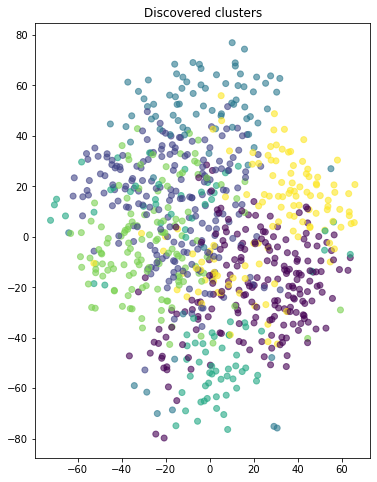

In [78]:
learningdf_scaled_reduced_tsne = TSNE(n_components=3, random_state=0).fit_transform(scaling_data)
labels = KMeans(n_clusters=6, random_state=0).fit_predict(scaling_data)

fig, axs = plt.subplots(1, 1, figsize=(6,8), sharey=True)
axs.scatter(learningdf_scaled_reduced_tsne[:,0], learningdf_scaled_reduced_tsne[:,1], c=labels, alpha=0.6)
axs.set_title("Discovered clusters")

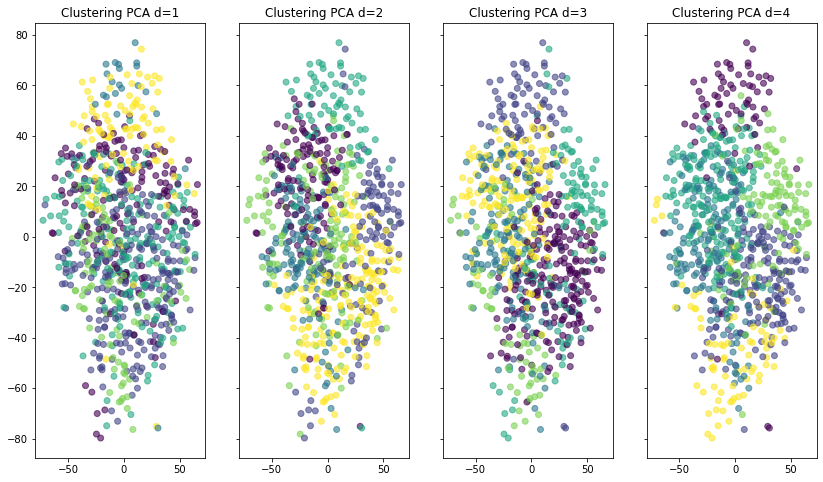

In [24]:
fig, axs = plt.subplots(1, 4, figsize=(14, 8), sharey=True)

for i in range(0, 4):
    X_reduced_pca = PCA(n_components=i+1).fit(scaling_data).transform(scaling_data)
    labels = KMeans(n_clusters=6, random_state=0).fit_predict(X_reduced_pca)
    axs[i].scatter(learningdf_scaled_reduced_tsne[:,0], learningdf_scaled_reduced_tsne[:,1], c=labels, alpha=0.6)
    axs[i].set_title("Clustering PCA d=%s"% (i+1))

In [25]:
hiphop = shuffle(hiphop)

In [26]:
#We don't want to take the year into account, because we know that it is extremely important, but we want to see if other features are as well
features = ["acousticness", "danceability", "duration", "energy", "instrumentalness",  "liveness", "speechiness", "loudness", "tempo",  "valence"]

In [27]:
X = hiphop[features]
y = hiphop['popularity']

In [28]:
features2 = ['speechiness', 'acousticness', 'loudness', 'valence']
X_train, X_test, y_train, y_test = train_test_split(X[features2], y, train_size=0.8, random_state=8)

In [29]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg.score(X_test, y_test)
#This returns the coefficient of determination of the prediction 

0.04868275318228743

In [30]:
intercept = linear_reg.intercept_
coefficient = linear_reg.coef_
print(intercept)
print(coefficient)
zip(features2, coefficient)

36.24695135689424
[-11.92122939   8.87399395   0.66941067 -10.74164678]


In [31]:
predicted_y = linear_reg.predict(X_test)

In [32]:
print('The goodness of fit estimate of this regression is',metrics.r2_score(y_test, predicted_y))
print('The MAE of this model is',metrics.mean_absolute_error(y_test, predicted_y))
print('The MSE of this model is',metrics.mean_squared_error(y_test, predicted_y))
print('The RMSE of this model is',np.sqrt(metrics.mean_squared_error(y_test, predicted_y)))

The goodness of fit estimate of this regression is 0.04868275318228743
The MAE of this model is 12.976687461864724
The MSE of this model is 253.33811092523626
The RMSE of this model is 15.91659859785489


In [33]:
scores_linear = cross_val_score(linear_reg, X, y, cv=5)
print(scores_linear)
print ('Accuracy of the linear model %0.2f (+/- %0.2f)' % (scores_linear.mean(), scores_linear.std() *2))
#Each score given is the R-squared of the model tried on 5 (cv = 5) samples of our model. We can clearly see that the model is not very accurate

[0.07593179 0.06927077 0.07674098 0.08128478 0.07842677]
Accuracy of the linear model 0.08 (+/- 0.01)


In [34]:
# iterate through folds 5-10
for folds in range(5,11):
    print('------------------------------------\n')
    print('K: {}'.format(folds))
    model_linear = LinearRegression()
    
    # Perform cross-validation
    scores_cross_val = cross_val_score(model_linear, X[features2], y, cv=folds)
    print("The cross-validated scores obtaines are: {}".format(scores_cross_val))
    print("The mean cross-validated r2 is: {}".format(np.mean(scores_cross_val)))
    print('Std CV R2: {}'.format(np.std(scores_cross_val)))
    
    # Make cross-validated predictions
    cross_validated_predictions = cross_val_predict(model_linear, X[features2], y, cv=folds)
    
    r2 = metrics.r2_score(y, cross_validated_predictions)
    print("The cross-predicted r2 is: {}".format(r2))

------------------------------------

K: 5
The cross-validated scores obtaines are: [0.04145426 0.0448664  0.04170768 0.04920549 0.04354738]
The mean cross-validated r2 is: 0.04415624299478806
Std CV R2: 0.002816594720176145
The cross-predicted r2 is: 0.044213608017714345
------------------------------------

K: 6
The cross-validated scores obtaines are: [0.04121464 0.04310427 0.04668844 0.04169177 0.04597903 0.04655607]
The mean cross-validated r2 is: 0.04420570331323315
Std CV R2: 0.0022844541020576115
The cross-predicted r2 is: 0.044219490472337086
------------------------------------

K: 7
The cross-validated scores obtaines are: [0.04255736 0.04113075 0.04470601 0.04425137 0.04598166 0.04733224
 0.04200465]
The mean cross-validated r2 is: 0.04399486151282196
Std CV R2: 0.002066310220474222
The cross-predicted r2 is: 0.04410914762896734
------------------------------------

K: 8
The cross-validated scores obtaines are: [0.04346907 0.0426556  0.03943749 0.04774692 0.03741453 0.05614

In [35]:
tree_depth_range = range(1, 20)
Tree_RMSE_scores = []
for depth in tree_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=5, scoring='neg_mean_squared_error')
    Tree_RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0, 0.5, 'RMSE (we are looking for the lowest)')

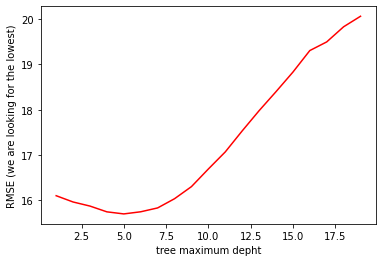

In [80]:
plt.plot(tree_depth_range, Tree_RMSE_scores,'r')
plt.xlabel('tree maximum depht')
plt.ylabel('RMSE (we are looking for the lowest)')


In [37]:
print('The lowest Root-Mean-Square Deviation is, and is attained for a depht of',sorted(zip(Tree_RMSE_scores, tree_depth_range))[0])

The lowest Root-Mean-Square Deviation is, and is attained for a depht of (15.696160262643906, 5)


In [38]:
treereg = DecisionTreeRegressor(max_depth=5, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(max_depth=5, random_state=1)

In [39]:
# Computing feature importances.
pd.DataFrame({'feature':features, 'feature_importance':treereg.feature_importances_}).sort_values(by='feature_importance', ascending=False)

,feature,feature_importance
2,duration,0.350264
9,valence,0.153927
6,speechiness,0.138884
5,liveness,0.087732
8,tempo,0.083580
7,loudness,0.071225
0,acousticness,0.060988
1,danceability,0.047609
3,energy,0.005792
4,instrumentalness,0.000000


In [40]:
RandomForestReg = RandomForestRegressor(n_estimators=150,max_features=4,oob_score=True,random_state=1) 
RandomForestReg.fit(X, y)

RandomForestRegressor(max_features=4, n_estimators=150, oob_score=True,
                      random_state=1)

In [41]:
pd.DataFrame({'feature':features,'feature_importance':RandomForestReg.feature_importances_}).sort_values(by='feature_importance', ascending=False)

,feature,feature_importance
2,duration,0.122922
8,tempo,0.111128
7,loudness,0.110337
9,valence,0.109827
6,speechiness,0.104799
5,liveness,0.102140
0,acousticness,0.101849
1,danceability,0.099778
3,energy,0.099343
4,instrumentalness,0.037878


In [42]:
print((RandomForestReg.oob_score_))

0.19349104633659764


In [43]:
scores_RandomForest = cross_val_score(RandomForestReg, X, y, cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores_RandomForest))

14.672855406414039

In [44]:
hiphop_classified = hiphop.copy()
hiphop_classified['popularity_score'] = pd.cut(hiphop_classified.popularity, bins=3, labels = ["not popular", "medium", "popular"], right = True)
hiphop_classified = hiphop_classified.drop(['artist_name','track_name','track_id'],axis = 1)

In [45]:
print(hiphop_classified['popularity_score'].value_counts(normalize=True))
#We have the percentages of songs per category in our dataframe

not popular    0.636266
medium         0.329460
popular        0.034275
Name: popularity_score, dtype: float64


In [46]:
#let's create 3 dataframes now
hiphop_notpopular = hiphop_classified[hiphop_classified.popularity_score == 'not popular']
hiphop_medium = hiphop_classified[hiphop_classified.popularity_score == 'medium']
hiphop_popular = hiphop_classified[hiphop_classified.popularity_score == 'popular']

In [47]:
X_train_notpopular, X_test_notpopular, y_train_notpopular, y_test_notpopular = train_test_split(hiphop_notpopular.drop(['popularity','popularity_score'],axis = 1),hiphop_notpopular,train_size = 0.8, random_state = 25)
X_train_medium, X_test_medium, y_train_medium, y_test_medium = train_test_split(hiphop_medium.drop(['popularity','popularity_score'],axis = 1),hiphop_medium,train_size = 0.8, random_state = 25)
X_train_popular, X_test_popular, y_train_popular, y_test_popular = train_test_split(hiphop_popular.drop(['popularity','popularity_score'],axis = 1),hiphop_popular,train_size = 0.8, random_state = 25)

In [48]:
train_popular = pd.concat([X_train_popular, y_train_popular], axis=1)
train_medium = pd.concat([X_train_medium, y_train_medium], axis=1)
train_notpopular = pd.concat([X_train_notpopular, y_train_notpopular], axis=1)
training = pd.concat([train_popular, train_medium, train_notpopular], axis=0)

In [49]:
test_popular = pd.concat([X_test_popular, y_test_popular], axis=1)
test_medium = pd.concat([X_test_medium, y_test_medium], axis=1)
test_notpopular = pd.concat([X_test_notpopular, y_test_notpopular], axis=1)
testing = pd.concat([test_popular, test_medium, test_notpopular], axis=0)

In [50]:
classified_X = training.drop(['popularity_score'], axis = 1)
classified_y = training.popularity_score

X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(classified_X,classified_y, train_size = 0.8, random_state=25)

In [51]:
dt = DecisionTreeClassifier(max_depth=20, random_state=15)
dt.fit(X_class_train, y_class_train)

pred = dt.predict(X_class_test)

print(accuracy_score(pred, y_class_test))
#The accuracy score of our model looks way too high, it seems that we are overfitting our model 


1.0


In [52]:

feature_cols = ['acousticness', 'speechiness', 'loudness', 'valence']
X = hiphop_classified[feature_cols]
y = hiphop_classified.popularity_score


In [53]:
KNN_X_train, KNN_X_test, KNN_y_train, KNN_y_test = train_test_split(X, y, random_state=25, train_size=0.8)

KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(KNN_X_train, KNN_y_train)

test_y_pred_class = KNN.predict(KNN_X_test)
print('The accuracy of this KNeighborsClassifier model is',metrics.accuracy_score(KNN_y_test, test_y_pred_class))

The accuracy of this KNeighborsClassifier model is 0.5741603334150527


Maximum accuracy is:- 0.6258886982103457 at K = 30


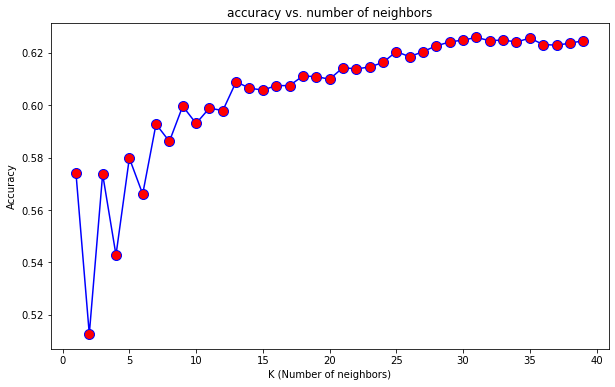

In [83]:
accuracy = []
for i in range(1,40):
    neighbor = KNeighborsClassifier(n_neighbors = i).fit(KNN_X_train,KNN_y_train)
    KNN_yhat = neighbor.predict(KNN_X_test)
    accuracy.append(metrics.accuracy_score(KNN_y_test, KNN_yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy,color = 'blue', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. number of neighbors')
plt.xlabel('K (Number of neighbors)')
plt.ylabel('Accuracy')
print("Maximum accuracy is:-",max(accuracy),"at K =",accuracy.index(max(accuracy)))
#N.B - The perfect number of neighbors changes at every iteration (but stays between 30 and 40)

In [84]:
KNN_X_train, KNN_X_test, KNN_y_train, KNN_y_test = train_test_split(X, y, random_state=25, train_size=0.8)

KNN = KNeighborsClassifier(n_neighbors=30)
KNN.fit(KNN_X_train, KNN_y_train)

KNN_y_pred_class = KNN.predict(KNN_X_test)
print('The accuracy of this model is',metrics.accuracy_score(KNN_y_test, KNN_y_pred_class))

The accuracy of this model is 0.624908065702378


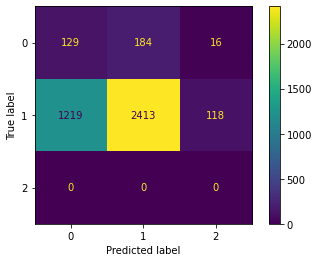

In [56]:
KNN_confusion_matrix = confusion_matrix(KNN_y_pred_class, KNN_y_test)
KNN_display = ConfusionMatrixDisplay(confusion_matrix(KNN_y_pred_class, KNN_y_test))
KNN_display.plot()

In [57]:
###Looking at the R-squared scores, we can clearly see that the linear regression doesn't work very well on our model, we can try something else now.
#It appears quite clearly that the popularity cannot we predicted through a linear model, therefore, let's try to do it through a non-linear one
#And this is when deep learning comes to the rescue 

In [58]:
neuraldf = hiphop.copy()
neuraldf = neuraldf.drop(['artist_name','track_name','track_id'], axis = 1)
a = neuraldf.drop('popularity', axis = 1).values
b = neuraldf.popularity.values

NN_X_train, NN_X_test, NN_y_train, NN_y_test = train_test_split(a,b, train_size = 0.8, random_state = 25, shuffle=True)

In [59]:
#Then we need to scale the data 

NN_X_train = StandardScaler().fit_transform(NN_X_train)
NN_X_test = StandardScaler().fit(NN_X_test).transform(NN_X_test)

In [60]:
Artificial_neural = tf.keras.models.Sequential()

2022-05-29 13:36:18.325104: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [61]:
#Creating the layers of our model
Artificial_neural.add(tf.keras.layers.Dense(15, input_dim=14, activation='relu'))
Artificial_neural.add(tf.keras.layers.Dense(4, activation='relu'))
Artificial_neural.add(tf.keras.layers.Dense(units=1))

In [62]:
Artificial_neural.compile(optimizer =tfa.optimizers.AdamW(learning_rate=1e-3, weight_decay = 1e-3), loss = 'mean_squared_error', metrics = ['mae'])
Artificial_neural.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                225       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 64        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [63]:
ANN_history = Artificial_neural.fit(NN_X_train, NN_y_train, validation_split=0.2, epochs = 30)

2022-05-29 13:36:18.940492: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/30
408/408 [==============================] - 1s 1ms/step - loss: 737.6191 - mae: 22.0324 - val_loss: 326.8665 - val_mae: 13.5426
Epoch 2/30
408/408 [==============================] - 0s 568us/step - loss: 269.1244 - mae: 12.1988 - val_loss: 212.3017 - val_mae: 10.8145
Epoch 3/30
408/408 [==============================] - 0s 586us/step - loss: 213.6240 - mae: 10.7919 - val_loss: 203.9361 - val_mae: 10.5622
Epoch 4/30
408/408 [==============================] - 0s 557us/step - loss: 205.0603 - mae: 10.5578 - val_loss: 198.8643 - val_mae: 10.4140
Epoch 5/30
408/408 [==============================] - 0s 563us/step - loss: 202.5673 - mae: 10.5323 - val_loss: 197.3387 - val_mae: 10.3874
Epoch 6/30
408/408 [==============================] - 0s 612us/step - loss: 191.9636 - mae: 10.3001 - val_loss: 194.5266 - val_mae: 10.3457
Epoch 7/30
408/408 [==============================] - 0s 596us/step - loss: 198.4058 - mae: 10.4285 - val_loss: 193.0093 - val_mae: 10.3088
Epoch 8/30
408/408 [==

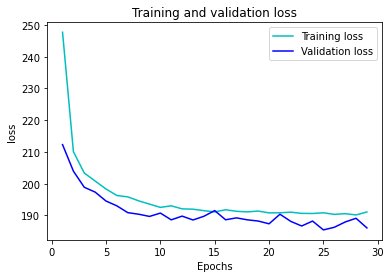

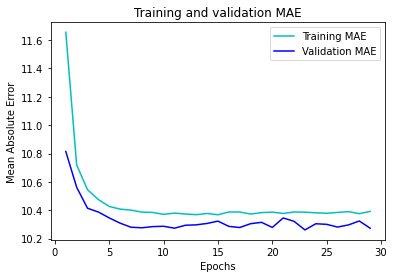

In [64]:
#plot training and validation accuracy and loss at each epoch
ANN_loss = ANN_history.history['loss']
ANN_val_loss = ANN_history.history['val_loss']
epochs = range(1, len(ANN_loss))
plt.plot(epochs, ANN_loss[1:], 'c', label='Training loss')
plt.plot(epochs, ANN_val_loss[1:], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

ANN_mae = ANN_history.history['mae']
ANN_val_mae = ANN_history.history['val_mae']
plt.plot(epochs, ANN_mae[1:], 'c', label='Training MAE')
plt.plot(epochs, ANN_val_mae[1:], 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [65]:
ANN_predictions = Artificial_neural.predict(NN_X_test)
print("Predicted values are: ", ANN_predictions[:10])
print("Real values are: ", NN_y_test[:10])

Predicted values are:  [[14.627077]
 [14.472023]
 [24.414248]
 [ 8.221514]
 [16.08923 ]
 [30.660437]
 [22.877693]
 [12.059963]
 [17.437624]
 [32.295982]]
Real values are:  [ 9  7 16 19 15 42 45  4 31 44]


Text(0, 0.5, 'Predicted popularity')

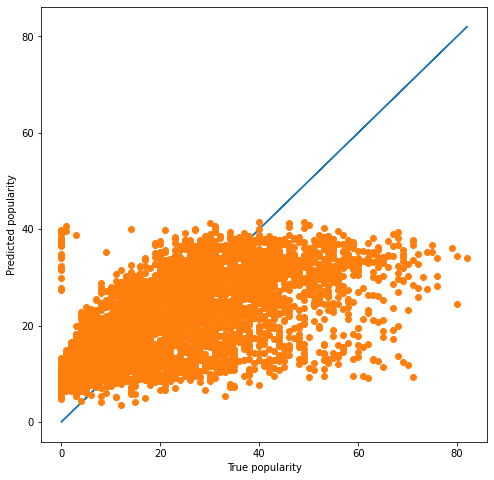

In [66]:
plt.figure(figsize=(8,8))
plt.plot(NN_y_test,NN_y_test)
plt.plot(NN_y_test,ANN_predictions, 'o')
plt.xlabel('True popularity')
plt.ylabel('Predicted popularity')
#We see that our model predicts the popularity well until the 40/45 threshold, then it doesn't 

In [67]:
mse_neural, mae_neural = Artificial_neural.evaluate(NN_X_test, NN_y_test)
print('Mean Squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)
print('Root Mean absolute error from neural net: ', np.sqrt(mae_neural))
print('The r2 score of this model is',metrics.r2_score(NN_y_test,ANN_predictions))

128/128 [==============================] - 0s 311us/step - loss: 190.8513 - mae: 10.4728
Mean Squared error from neural net:  190.851318359375
Mean absolute error from neural net:  10.472816467285156
Root Mean absolute error from neural net:  3.2361731207222455
The r2 score of this model is 0.282534042510609


In [68]:
classified_neuraldf = hiphop_classified.copy()

In [69]:
Y = classified_neuraldf.popularity_score

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

dummy_y = to_categorical(encoded_Y)
dummy_y


array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [70]:
classified_a = classified_neuraldf.drop('popularity_score',axis = 1)
classified_X_train, classified_X_test, classified_y_train, classified_y_test = train_test_split(classified_a,dummy_y,train_size = 0.8,random_state=25)
classified_X_train = StandardScaler().fit_transform(classified_X_train)
classified_X_test = StandardScaler().fit(classified_X_test).transform(classified_X_test)

In [71]:
classified_X_train.shape

(16315, 15)

In [72]:
classified_Artifical_neural = tf.keras.models.Sequential()
classified_Artifical_neural.add(tf.keras.layers.Dense(16, input_dim=15, activation='relu'))
classified_Artifical_neural.add(tf.keras.layers.Dense(4, activation='relu'))
classified_Artifical_neural.add(tf.keras.layers.Dense(units=3, activation = 'softmax'))
classified_Artifical_neural.compile(optimizer =tfa.optimizers.AdamW(learning_rate=1e-3, weight_decay = 1e-3), loss = 'categorical_crossentropy', metrics = ['acc'])
classified_Artifical_neural.summary()

classified_history = classified_Artifical_neural.fit(classified_X_train, classified_y_train, validation_split=0.2, epochs = 30)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 15        
Total params: 339
Trainable params: 339
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
408/408 [==============================] - 0s 713us/step - loss: 1.0497 - acc: 0.4430 - val_loss: 0.5825 - val_acc: 0.8287
Epoch 2/30
408/408 [==============================] - 0s 509us/step - loss: 0.4746 - acc: 0.8627 - val_loss: 0.3115 - val_acc: 0.9271
Epoch 3/30
408/408 [==============================] - 0s 499us/step - loss: 0.2781 - acc: 0.9374 - val_loss: 0.2500 - 

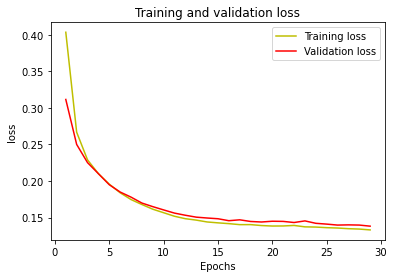

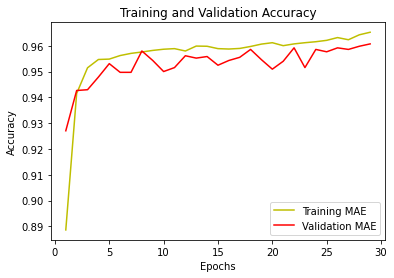

In [73]:
classified_loss = classified_history.history['loss']
classified_val_loss = classified_history.history['val_loss']
epochs = range(1, len(classified_loss))
plt.plot(epochs, classified_loss[1:], 'y', label='Training loss')
plt.plot(epochs, classified_val_loss[1:], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

classified_accuracy = classified_history.history['acc']
classified_val_accuracy = classified_history.history['val_acc']
plt.plot(epochs, classified_accuracy[1:], 'y', label='Training MAE')
plt.plot(epochs, classified_val_accuracy[1:], 'r', label='Validation MAE')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [74]:
classified_predictions = classified_Artifical_neural.predict(classified_X_test)

In [75]:
classified_y_pred = classified_predictions.max(axis=1,keepdims=1) == classified_predictions
classified_y_pred = classified_y_pred*1
y_pred_bis = []
classified_y_test_bis = []
for i, e in enumerate(classified_y_pred):
    if (e == [1, 0, 0]).all():
        y_pred_bis.append(0)
    elif (e == [0, 1, 0]).all():
        y_pred_bis.append(1)
    elif (e == [0, 0, 1]).all():
        y_pred_bis.append(2)
    elif (e == [0, 0, 0]).all():
        y_pred_bis.append(2)


for i, e in enumerate(classified_y_test):
    if (e == [1, 0, 0]).all():
        classified_y_test_bis.append(0)
    elif (e == [0, 1, 0]).all():
        classified_y_test_bis.append(1)
    elif (e == [0, 0, 1]).all():
        classified_y_test_bis.append(2)


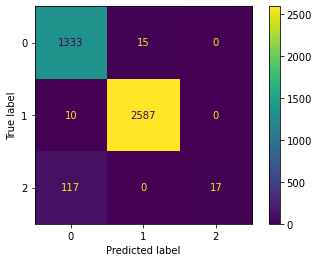

In [76]:
confusion_matrix(classified_y_test_bis,y_pred_bis)
disp = ConfusionMatrixDisplay(confusion_matrix(classified_y_test_bis,y_pred_bis))
disp.plot()